In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
import math
lr = LinearRegression()

# Sintetico #1

In [4]:
df1  = pd.read_csv("Sintetico.csv",delimiter='\t',header=None)
df1.rename(columns={0:'x1',1:'x2',2:'target'},inplace=True)
X = df1.iloc[:,0].to_numpy().reshape(-1,1)
y = df1.iloc[:,1].to_numpy()
df1.head(3)
# y
# X

,x1,x2,target
0,0.665117,0.619822,0
1,0.389321,0.341135,0
2,0.693654,0.622386,0


# Grafica #1

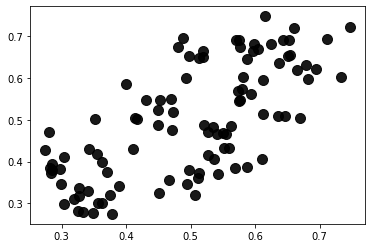

In [5]:
plt.scatter(df1.x1,df1.x2,color="black",s=100,alpha=0.9)

# Regresion lineal

In [6]:
X_train = X[:50]
X_test  = X[50:]
y_train = y[:50]
y_test  = y[50:]
lr.fit(X_train,y_train)
y_pred  = lr.predict(X_test) 
b1      = lr.coef_[0]

# Grafica #2

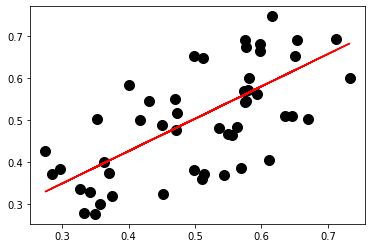

In [7]:
plt.scatter(X_test,y_test,color="black",s=100)
plt.plot(X_test,y_pred,color="red")

## Error absoluto medio

In [8]:
print('Mean absolute error: %.2f'% float(mean_absolute_error(y_test, y_pred)))

Mean absolute error: 0.08


# Error cuadrado medio

In [359]:
MSE = mean_squared_error(y_test, y_pred)
print('Mean squared error: %.2f'% MSE)

Mean squared error: 0.01


# Raiz del error cuadrado medio  

In [360]:
print('Root Mean squared error: %.2f'% math.sqrt(MSE))

Root Mean squared error: 0.10


# Coeficiento de determinacion

In [361]:
print('Coefficient of determination: %.2f'% float(r2_score(y_test,y_pred)*100 ) + "%")

Coefficient of determination: 41.27%


# Grafica #3

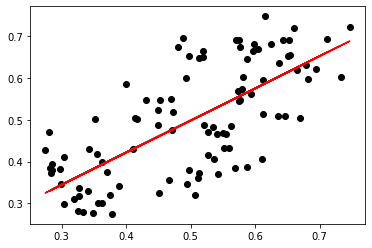

In [362]:
b0 = np.mean(y)-np.mean(X)*b1
plt.scatter(X,y,color="black")
plt.plot(X,b0 + b1*X,color="red")

## Residuals

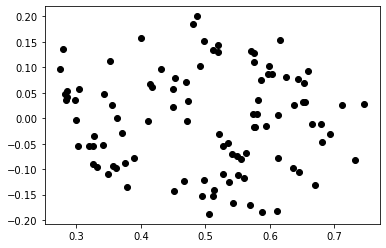

In [368]:
y_pred    = lr.predict(X)
residuals = y-y_pred
plt.scatter(X,residuals,color="black")

# Sintetico 2

In [9]:
lr2 = LinearRegression()
df2 = pd.read_csv("Sintetico2.csv",delimiter="\t",header=None)
df2.rename(columns={0:'x',1:'y'},inplace=True)
df2.drop(columns=[2],inplace=True)
X = df2['x'].to_numpy().reshape(-1,1)
y = df2['y'].to_numpy().reshape(-1,1)

# Grafica #1

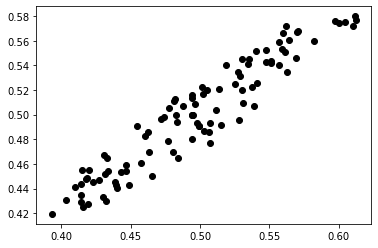

In [10]:
plt.scatter(X,y,color="black")

# Regresion lineal

In [11]:
X_train = X[:50]
X_test  = X[50:]
y_train = y[:50]
y_test  = y[50:]
lr2.fit(X_train,y_train)
y_pred  = lr.predict(X_test) 
b1      = lr.coef_[0]
# b0 = np.mean(y)-np.mean(X)*b1

# Grafica #2

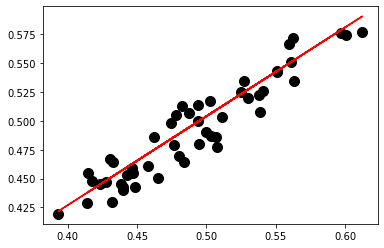

In [394]:
plt.scatter(X_test,y_test,color="black",s=100)
plt.plot(X_test,y_pred,color="red")

# Residuales

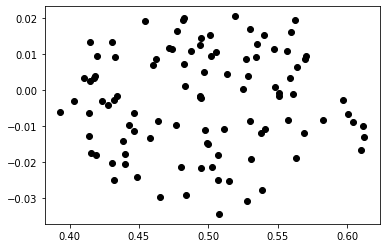

In [12]:
y_pred    = lr2.predict(X)
residuals = y-y_pred
plt.scatter(X,residuals,color="black")

# Data

In [360]:
df = pd.read_csv("data.csv")
df

,x,y
0,0,394.33
1,4,329.50
2,8,291.00
3,12,255.17
4,16,229.33
5,20,204.83
6,24,179.00
7,28,163.83
8,32,150.33


In [393]:
lr3 = LinearRegression()
X       = df['x'].to_numpy().reshape(-1,1)
y       = df['y'].to_numpy().reshape(-1,1)

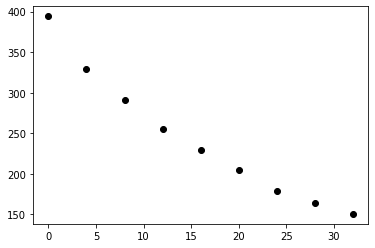

In [394]:
plt.scatter(X,y,color="black")

In [395]:
lr3.fit(X,y)
b1     = lr3.coef_[0][0]
b0     = np.mean(y)-np.mean(X)*b1

In [396]:
y_pred=lr3.predict(X)

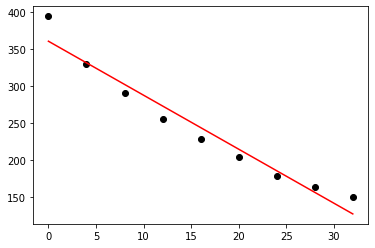

In [398]:
plt.scatter(X,y,color="black")
plt.plot(X,y_pred,color="red")

In [399]:
residuals = y-y_pred

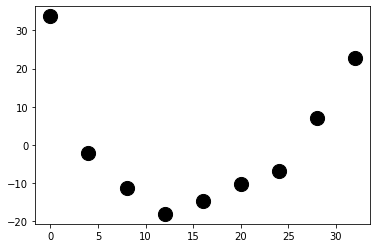

In [400]:
plt.scatter(X,residuals,color="black",s=200)

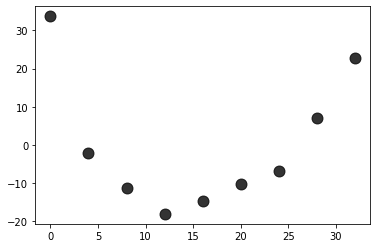

In [359]:
DV    = np.log10(y)
_DV   = np.log10(b0+b1*X)
pred  = np.power(10,_DV)
res   = y - pred
# y,pred
x0 = np.linspace(np.min(X),np.max(X),100)
y0 = np.zeros(100)
# plt.plot(x0,y0,color="red")
plt.scatter(X,res,color="black",s=120,alpha=0.8)

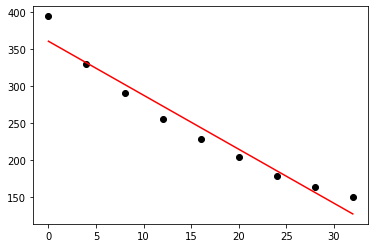

In [347]:
# pred,y
plt.scatter(X,y,color="black")
plt.plot(X,pred,color="red")

In [348]:
print('Mean absolute error: %.2f'% float(mean_absolute_error(y, pred)))
MSE = mean_squared_error(y, pred)
print('Mean squared error: %.2f'% MSE)
print('Root Mean squared error: %.2f'% math.sqrt(MSE))
print('Coefficient of determination: %.2f'% float(r2_score(y,pred)*100 ) + "%")

Mean absolute error: 14.09
Mean squared error: 281.28
Root Mean squared error: 16.77
Coefficient of determination: 95.26%


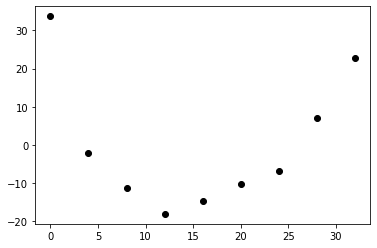

In [349]:
DV   = np.sqrt(y)
_DV  = np.sqrt(b0+b1*X)
pred = np.power(_DV,2)
res  = y-pred
plt.scatter(X,res,color="black")

In [350]:
print('Mean absolute error: %.2f'% float(mean_absolute_error(y, pred)))
MSE = mean_squared_error(y, pred)
print('Mean squared error: %.2f'% MSE)
print('Root Mean squared error: %.2f'% math.sqrt(MSE))
print('Coefficient of determination: %.2f'% float(r2_score(y,pred)*100 ) + "%")

Mean absolute error: 14.09
Mean squared error: 281.28
Root Mean squared error: 16.77
Coefficient of determination: 95.26%


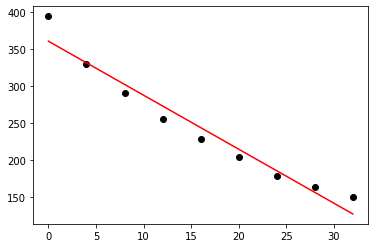

In [333]:
plt.scatter(X,y,color="black")
plt.plot(X,pred,color="red")